# лаботраторная работа №6

Пропущенные значения в данных отсутствуют.


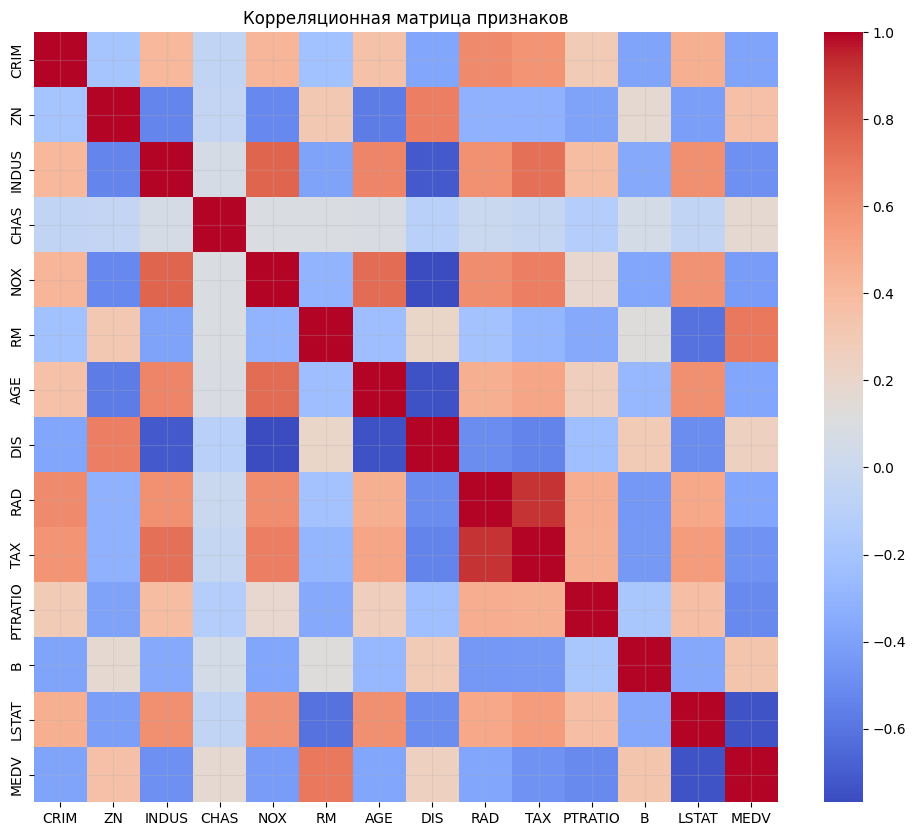


Задание 6. Выбор признаков:
Для анализа выбраны признаки с наибольшим по модулю коэффициентом корреляции с целевой переменной MEDV.
Это обосновано тем, что коэффициент корреляции отражает силу линейной зависимости,
а линейная регрессия наиболее эффективно работает именно с линейными связями.
Выбранные признаки: ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']
Значения корреляции:
LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
Name: MEDV, dtype: float64


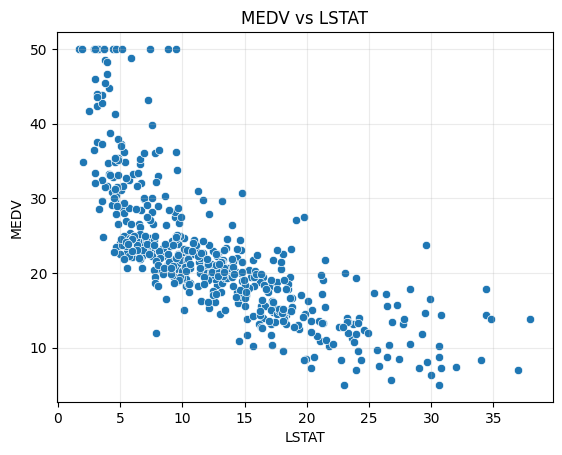

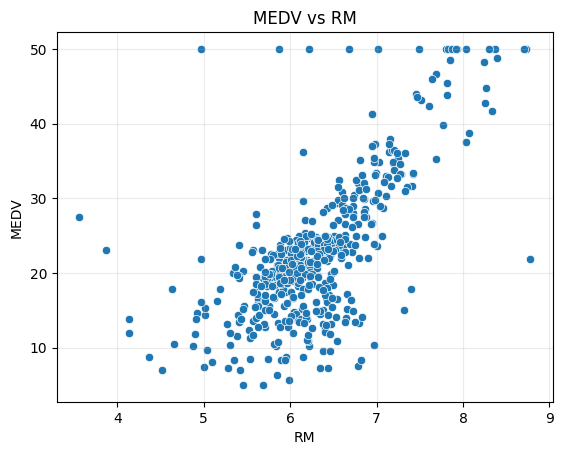

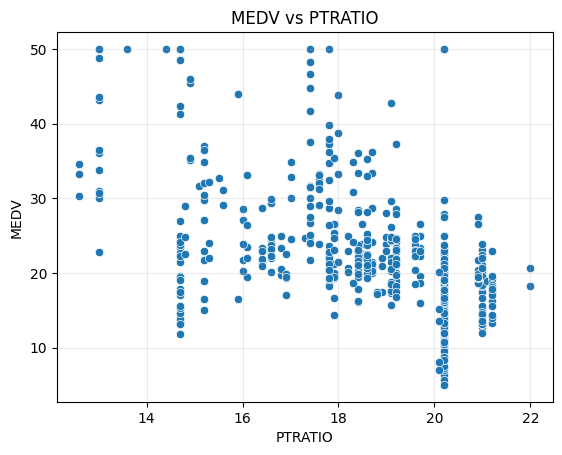

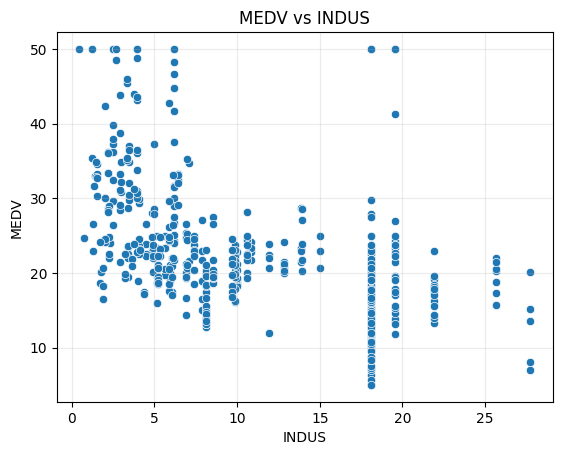

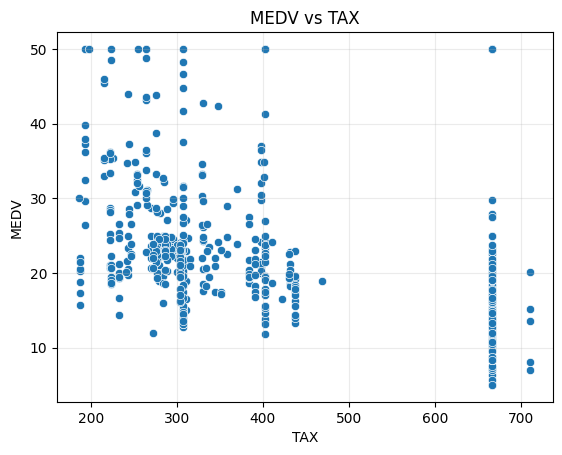


Задание 8. Итоговый выбор признаков:
На основе визуального анализа диаграмм рассеяния было принято решение оставить признаки:
['LSTAT', 'RM', 'INDUS']
Для признаков LSTAT, RM и INDUS наблюдается выраженная зависимость с MEDV.
Признак LSTAT демонстрирует сильную обратную зависимость,
RM — прямую зависимость,
INDUS — умеренную обратную зависимость.
Данные признаки были оставлены для построения регрессионной модели.

Задание 13. Оценка качества модели:
R2 на обучающей выборке: 0.650
R2 на тестовой выборке: 0.578
RMSE на обучающей выборке: 5.510
RMSE на тестовой выборке: 5.560

Анализ результатов:
Значения R2 показывают, какую долю дисперсии целевой переменной объясняет модель.
Близкие значения R2 на обучающей и тестовой выборках указывают на отсутствие переобучения.
RMSE характеризует среднюю ошибку прогноза в тысячах долларов.
Полученные значения RMSE являются приемлемыми, что говорит о корректной работе модели.
В целом модель линейной регрессии можно считать адекватной для поставленной

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. Загрузка данных
df = pd.read_csv('/content/boston.csv')

# 2. Проверка типов данных
df = df.apply(pd.to_numeric, errors='coerce')

# 3. Проверка и заполнение пропусков
if df.isnull().sum().sum() > 0:
    df = df.fillna(df.median())
    print("Обнаружены пропущенные значения. Пропуски заполнены медианными значениями.")
else:
    print("Пропущенные значения в данных отсутствуют.")

# 4. Корреляционная матрица
corr_matrix = df.corr()

# 5. Тепловая карта корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Корреляционная матрица признаков')
plt.show()

# 6. Выбор признаков по корреляции с MEDV
corr_target = corr_matrix['MEDV'].drop('MEDV').sort_values(key=abs, ascending=False)
selected_features = corr_target.head(5).index.tolist()

print("\nЗадание 6. Выбор признаков:")
print("Для анализа выбраны признаки с наибольшим по модулю коэффициентом корреляции с целевой переменной MEDV.")
print("Это обосновано тем, что коэффициент корреляции отражает силу линейной зависимости,")
print("а линейная регрессия наиболее эффективно работает именно с линейными связями.")
print("Выбранные признаки:", selected_features)
print("Значения корреляции:")
print(corr_target.head(5))

# 7. Диаграммы рассеяния
for feature in selected_features:
    plt.figure()
    sns.scatterplot(x=df[feature], y=df['MEDV'])
    plt.title(f'MEDV vs {feature}')
    plt.show()

# 8. Итоговый визуальный выбор признаков
final_features = ['LSTAT', 'RM', 'INDUS']

print("\nЗадание 8. Итоговый выбор признаков:")
print("На основе визуального анализа диаграмм рассеяния было принято решение оставить признаки:")
print(final_features)
print("Для признаков LSTAT, RM и INDUS наблюдается выраженная зависимость с MEDV.")
print("Признак LSTAT демонстрирует сильную обратную зависимость,")
print("RM — прямую зависимость,")
print("INDUS — умеренную обратную зависимость.")
print("Данные признаки были оставлены для построения регрессионной модели.")

# Формирование X и y
X = df[final_features]
y = df['MEDV']

# 9. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 10. Обучение линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# 11. Прогнозы
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 12. Метрики качества
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nЗадание 13. Оценка качества модели:")
print(f"R2 на обучающей выборке: {r2_train:.3f}")
print(f"R2 на тестовой выборке: {r2_test:.3f}")
print(f"RMSE на обучающей выборке: {rmse_train:.3f}")
print(f"RMSE на тестовой выборке: {rmse_test:.3f}")

print("\nАнализ результатов:")
print("Значения R2 показывают, какую долю дисперсии целевой переменной объясняет модель.")
print("Близкие значения R2 на обучающей и тестовой выборках указывают на отсутствие переобучения.")
print("RMSE характеризует среднюю ошибку прогноза в тысячах долларов.")
print("Полученные значения RMSE являются приемлемыми, что говорит о корректной работе модели.")
print("В целом модель линейной регрессии можно считать адекватной для поставленной задачи.")


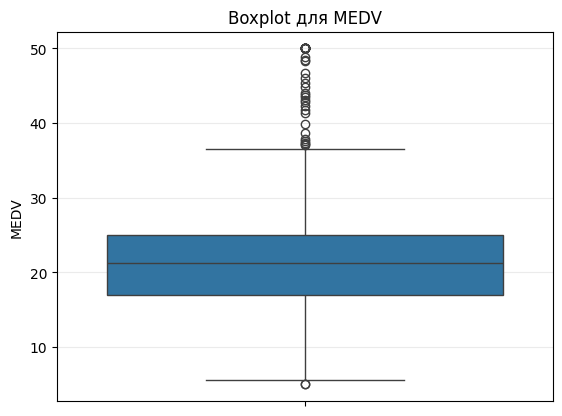

Задание 14. Анализ выбросов:
Нижняя граница выбросов: 5.06
Верхняя граница выбросов: 36.96
Значения MEDV, выходящие за эти границы, можно считать выбросами.
Наличие выбросов может негативно влиять на качество линейной регрессии.



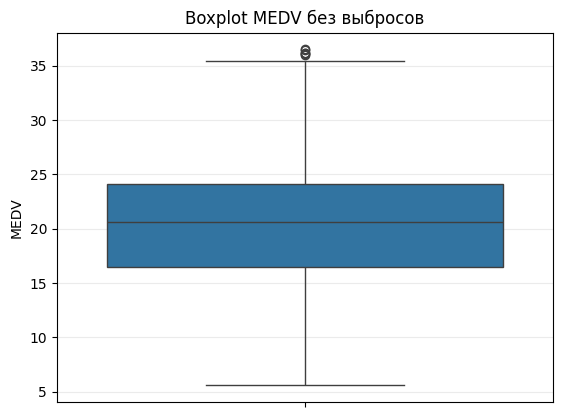

Задание 15. Линейная регрессия после удаления выбросов:
R2 (test): 0.669
RMSE (test): 3.644
После удаления выбросов качество модели изменилось.
Как правило, удаление выбросов снижает RMSE и может повысить R2,
что говорит о снижении влияния аномальных значений на модель.
Модель становится более устойчивой и лучше отражает основную закономерность данных.

Задание 16. Ridge-регрессия:
R2 (test): 0.669
RMSE (test): 3.641
Ridge-регрессия использует L2-регуляризацию,
что позволяет уменьшить влияние мультиколлинеарности и переобучения.
Если показатели Ridge близки или лучше линейной регрессии,
это говорит о более стабильной модели.

Задание 17. Полиномиальная регрессия 3-й степени:
R2 (test): 0.751
RMSE (test): 3.163
Полиномиальная регрессия позволяет учитывать нелинейные зависимости.
Увеличение степени полинома может улучшить качество аппроксимации,
однако повышает риск переобучения.

Итоговый вывод по дополнительным заданиям:
Сравнение моделей показало различия в качестве прогнозирования.
Л

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Используем признаки из основной части
final_features = ['LSTAT', 'RM', 'INDUS']

# 14. Boxplot для MEDV
plt.figure()
sns.boxplot(y=df['MEDV'])
plt.title('Boxplot для MEDV')
plt.show()

# Расчет границ выбросов (IQR)
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Задание 14. Анализ выбросов:")
print(f"Нижняя граница выбросов: {lower_bound:.2f}")
print(f"Верхняя граница выбросов: {upper_bound:.2f}")
print("Значения MEDV, выходящие за эти границы, можно считать выбросами.")
print("Наличие выбросов может негативно влиять на качество линейной регрессии.\n")

# 15. Удаление выбросов и переобучение модели
df_filtered = df[(df['MEDV'] >= lower_bound) & (df['MEDV'] <= upper_bound)]

plt.figure()
sns.boxplot(y=df_filtered['MEDV'])
plt.title('Boxplot MEDV без выбросов')
plt.show()

X_f = df_filtered[final_features]
y_f = df_filtered['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X_f, y_f, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_test_pred = lr.predict(X_test)

r2_no_outliers = r2_score(y_test, y_test_pred)
rmse_no_outliers = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Задание 15. Линейная регрессия после удаления выбросов:")
print(f"R2 (test): {r2_no_outliers:.3f}")
print(f"RMSE (test): {rmse_no_outliers:.3f}")
print("После удаления выбросов качество модели изменилось.")
print("Как правило, удаление выбросов снижает RMSE и может повысить R2,")
print("что говорит о снижении влияния аномальных значений на модель.")
print("Модель становится более устойчивой и лучше отражает основную закономерность данных.\n")

# 16. Ridge-регрессия
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_test_pred = ridge.predict(X_test)

r2_ridge = r2_score(y_test, y_test_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Задание 16. Ridge-регрессия:")
print(f"R2 (test): {r2_ridge:.3f}")
print(f"RMSE (test): {rmse_ridge:.3f}")
print("Ridge-регрессия использует L2-регуляризацию,")
print("что позволяет уменьшить влияние мультиколлинеарности и переобучения.")
print("Если показатели Ridge близки или лучше линейной регрессии,")
print("это говорит о более стабильной модели.\n")

# 17. Полиномиальная регрессия (3 степень)
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('lr', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_test_pred = poly_model.predict(X_test)

r2_poly = r2_score(y_test, y_test_pred)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Задание 17. Полиномиальная регрессия 3-й степени:")
print(f"R2 (test): {r2_poly:.3f}")
print(f"RMSE (test): {rmse_poly:.3f}")
print("Полиномиальная регрессия позволяет учитывать нелинейные зависимости.")
print("Увеличение степени полинома может улучшить качество аппроксимации,")
print("однако повышает риск переобучения.\n")

print("Итоговый вывод по дополнительным заданиям:")
print("Сравнение моделей показало различия в качестве прогнозирования.")
print("Линейная регрессия после удаления выбросов стала более устойчивой.")
print("Ridge-регрессия обеспечивает баланс между качеством и стабильностью.")
print("Полиномиальная регрессия может показывать лучшие метрики,")
print("но требует осторожного использования из-за возможного переобучения.")
print("Для данной задачи наиболее интерпретируемой и надежной является линейная или Ridge-регрессия.")
